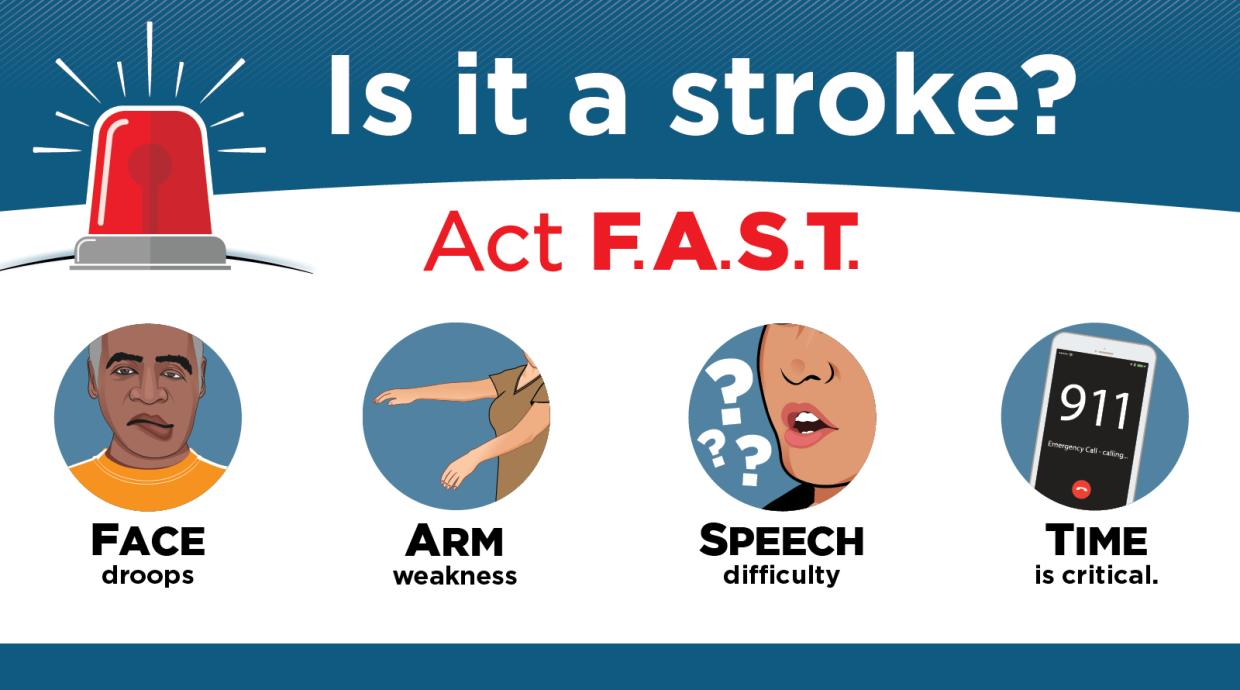

This is an introductory piece of work on taking multiple inputs and testing on the accuracy a prediction of a binary output. Stroke or No Stroke. 

It's relatively straight forward. 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
dataframe = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [ ]:
# we'll take a quick peek at the data
dataframe.head()

In [ ]:
# necessary machine learning imports 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# I decided to copy the dataframe just in case 
df = dataframe.copy()

In [ ]:
# change gender, Male = 1, Female = 0
df['gender'] = (df['gender'] == 'Male').astype(int)

# change married, Yes = 1, No = 0
df['ever_married'] = (df['ever_married'] == 'Yes').astype(int)

# change residence, Urban = 1, Rural = 0
df['Residence_type'] = (df['Residence_type'] == 'Urban').astype(int)

# clean up and drop some data - I didn't add smoking status and still scored high
df.drop(['id', 'work_type', 'smoking_status'], inplace=True, axis=1)

# drop all the NaN values
df.dropna()

Now let's separate the values into an X and y dataset, and make sure they're all floats.

In [ ]:
X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
X = X.astype('float32')

In [ ]:
y = LabelEncoder().fit_transform(y)

Split the dataset into training and testing datasets. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# a nice code snippet to maintain the same amount of features
n_features = X_train.shape[1]

**Build the model with 3 layers.**

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: %.3f' % acc)

And that was it! 95% accuracy! Not bad for a quick run. 